<a href="https://colab.research.google.com/github/Khiet-ht/AI/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = cifar10.load_data()



In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


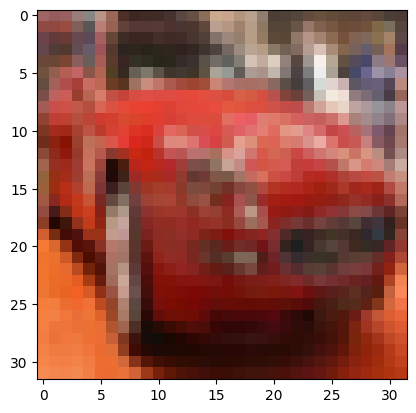

So:  [1]


In [ ]:
image = x_train[5]
plt.imshow(image)
plt.show()
print('So: ',y_train[5])

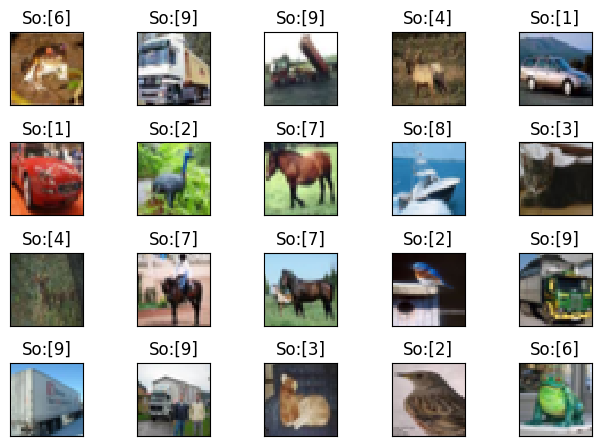

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model =  Sequential()
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_15 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_16 (Dense)            (None, 500)               500500    
                                                                 
 dense_17 (Dense)            (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = x_test
Y = y_test
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=128)
test_loss, test_acc = model.evaluate(x_test,y_test)
print('mat mat: ',test_loss)
print('Do chinh xac: ',test_acc)


Epoch 1/3
391/391 [==============================] - 128s 323ms/step - loss: 2.2294 - accuracy: 0.2523
Epoch 2/3
391/391 [==============================] - 121s 311ms/step - loss: 1.8100 - accuracy: 0.3495
Epoch 3/3
313/313 [==============================] - 9s 29ms/step - loss: 1.6859 - accuracy: 0.3931
mat mat:  1.6858527660369873
Do chinh xac:  0.39309999346733093


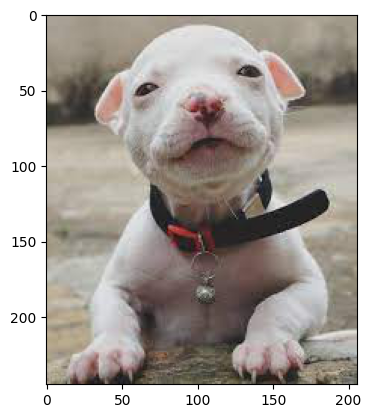

In [ ]:
from keras.utils import load_img,img_to_array
img= load_img('cho.jpg')
plt.imshow(img)
plt.show()

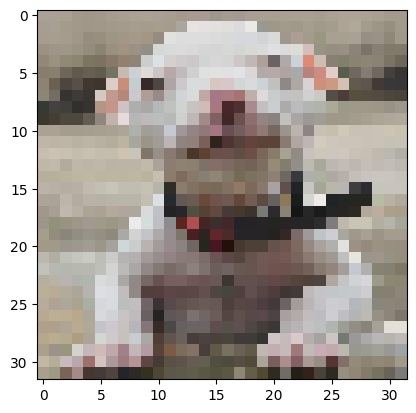

In [ ]:
img = load_img('cho.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 1s 527ms/step


array([9])